In [1]:
import scipy
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import matplotlib

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [5]:
np.random.seed(123)

data = []
err = []
for i,v in enumerate(np.linspace(0,4*3.14,50)):
    f = 5+v**2
    err.append(1.2*np.sqrt(f))
    data.append(np.random.normal(f,1.2*np.sqrt(f),1)+f)
data = np.array([x[0] for x in data])
err = np.array(err)
x = np.linspace(0,4*3.14,50)

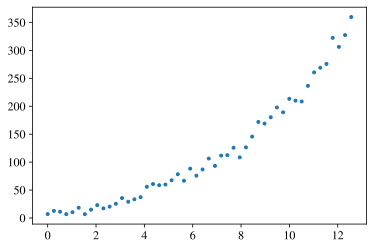

In [3]:
plt.plot(x,data,'.')

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


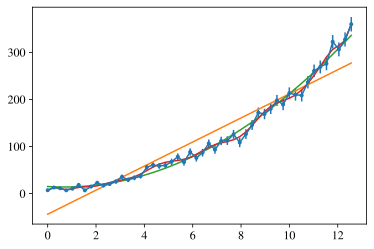

In [11]:
p, residuals, _, _, _ =  np.polyfit(x,data,2,full=True)

m0 = np.polyfit(x,data,1)
m1 = np.polyfit(x,data,2)
m2 = np.polyfit(x,data,20)

plt.errorbar(x,data,yerr=err,marker='.')
plt.plot(x,np.polyval(m0,x))
plt.plot(x,np.polyval(m1,x))
plt.plot(x,np.polyval(m2,x))

plt.show()



In [205]:
residuals / (len(data) - 3)

array([112.1033214])

In [206]:
def chisq(o,e):
    return(np.sum((o-e)**2/e)/len(o))

In [212]:
chisq(np.polyval(m2,x),data)

0.6070784377057467

In [172]:
print(data,chisquare(np.polyval(m1,x)))

[-3.42815302e+00  7.27935002e+00  4.11561119e+00 -6.31813755e+00
 -4.09074764e-02  1.87080582e+01 -1.55278410e+01  4.03370513e+00
  2.48508677e+01  1.74748025e+00  5.80114289e+00  1.64835057e+01
  4.50412205e+01  1.30938213e+01  1.94858644e+01  2.29384994e+01
  8.22004214e+01  8.88601605e+01  6.82764377e+01  5.90380013e+01
  7.38195728e+01  1.00758769e+02  3.88024209e+01  1.06669718e+02
  3.86156116e+01  6.34477263e+01  1.21396197e+02  4.78437986e+01
  9.99477378e+01  8.01952680e+01  1.10354864e+02  1.62150353e+01
  6.33678402e+01  1.15295112e+02  1.94585836e+02  1.55136024e+02
  1.72435004e+02  2.14712324e+02  1.48690735e+02  2.16116898e+02
  1.70767260e+02  1.31700662e+02  2.12669051e+02  2.76723209e+02
  2.75571704e+02  2.67413461e+02  4.21604797e+02  3.17235155e+02
  3.65169546e+02  4.58507388e+02] Power_divergenceResult(statistic=5175.370676332666, pvalue=0.0)


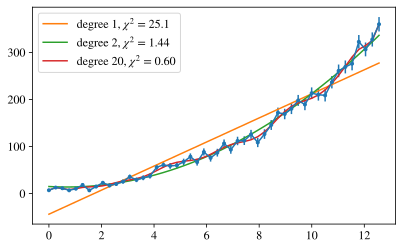

In [15]:
fig = plt.figure(figsize=(6.52437527778,4))
gs = plt.GridSpec(nrows=1, ncols=1,hspace=.5,wspace=.3)

ax = fig.add_subplot(gs[0,0])

plt.errorbar(x,data,yerr=err,marker='.')
ax.plot(x,np.polyval(m0,x),label='degree 1, $\chi^2$ = 25.1')
ax.plot(x,np.polyval(m1,x),label='degree 2, $\chi^2$ = 1.44')
ax.plot(x,np.polyval(m2,x),label='degree 20, $\chi^2$ = 0.60')

ax.legend()
plt.savefig('overfit_underfit.pdf')  